In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io
from cellpose.io import imread

In [2]:
io.logger_setup()

2024-12-25 04:12:04,196 [INFO] WRITING LOG OUTPUT TO /home/krati/.cellpose/run.log
2024-12-25 04:12:04,197 [INFO] 
cellpose version: 	3.1.0 
platform:       	linux 
python version: 	3.10.16 
torch version:  	2.5.1+cu124


(<Logger cellpose.io (INFO)>, PosixPath('/home/krati/.cellpose/run.log'))

In [3]:
# list of files
# PUT PATH TO YOUR FILES HERE!
files = ['../images/A-1.jpg']

In [4]:
imgs = [imread(f) for f in files]
nimg = len(imgs)

In [5]:
# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images


In [6]:
# model_type='cyto' or 'nuclei' or 'cyto2' or 'cyto3'
model = models.Cellpose(model_type='cyto3', gpu=True)

2024-12-25 04:13:00,196 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 04:13:00,198 [INFO] >>>> using GPU (CUDA)
2024-12-25 04:13:00,199 [INFO] >> cyto3 << model set to be used
2024-12-25 04:13:00,335 [INFO] >>>> loading model /home/krati/.cellpose/models/cyto3
2024-12-25 04:13:00,489 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

In [7]:
masks, flows, styles, diams = model.eval(imgs, diameter=30, channels=channels, flow_threshold=0.4, do_3D=False)


2024-12-25 04:13:08,155 [INFO] channels set to [[0, 0]]
2024-12-25 04:13:08,158 [INFO] ~~~ FINDING MASKS ~~~
2024-12-25 04:13:08,160 [INFO] multi-stack tiff read in as having 12000 planes 1 channels
2024-12-25 04:13:09,550 [INFO] running YX: 12000 planes of size (12000, 1)
2024-12-25 04:35:11,733 [INFO] 94%|#########4| 11283/12000 [22:02<01:26,  8.24it/s]


: 

In [8]:
from cellpose import io
io.masks_flows_to_seg(imgs, masks, flows, "output", channels=channels, diams=diams)

In [9]:
from cellpose import io
io.save_masks(imgs, masks, flows, "pngoutput", png=True)

In [10]:
# from cellpose import plot

# nimg = len(imgs)
# for idx in range(nimg):
#     maski = masks[idx]
#     flowi = flows[idx][0]

#     fig = plt.figure(figsize=(12,5))
#     plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels[idx])
#     plt.tight_layout()
#     plt.show()

KeyboardInterrupt: 

In [ ]:
# import numpy as np
# from cellpose import plot, utils, io
# dat = np.load('output_seg.npy', allow_pickle=True).item()
# img = io.imread('../images/A-1.jpg')

# # plot image with masks overlaid
# mask_RGB = plot.mask_overlay(img, dat['masks'])

# # plot image with outlines overlaid in red
# outlines = utils.outlines_list(dat['masks'])
# plt.imshow(img)
# for o in outlines:
#     plt.plot(o[:,0], o[:,1], color='r')

KeyboardInterrupt: 

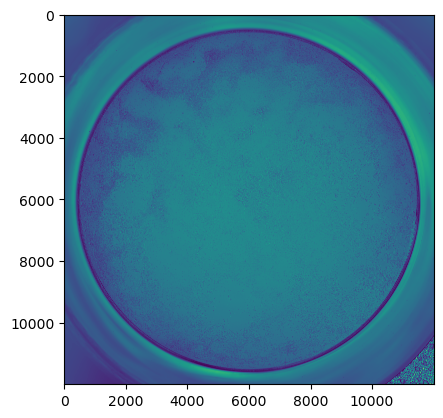

In [12]:
img = io.imread('../images/A-1.jpg')
plt.imshow(img) 
plt.show()

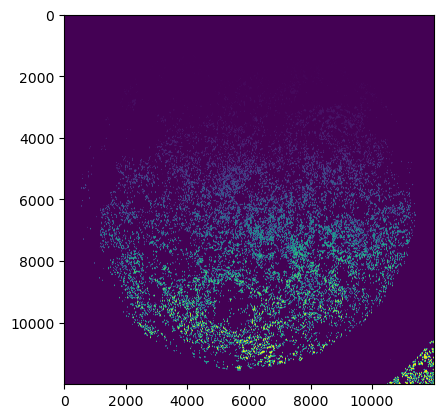

In [13]:
img = io.imread('p_cp_masks.png')
plt.imshow(img) 
plt.show()

In [16]:
# # plot image with masks overlaid
# mask_RGB = plot.mask_overlay(img, dat['masks'])

KeyboardInterrupt: 

In [15]:

# plt.imshow(mask_RGB) 
# plt.show()

KeyboardInterrupt: 

In [14]:



### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='livecell_cp3', gpu=True)

masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)

2024-12-25 03:00:40,204 [INFO] >> livecell_cp3 << model set to be used
2024-12-25 03:00:40,276 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:00:40,277 [INFO] >>>> using GPU (CUDA)
2024-12-25 03:00:40,394 [INFO] >>>> loading model /home/krati/.cellpose/models/livecell_cp3
2024-12-25 03:00:40,503 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

In [15]:
from cellpose import io
io.masks_flows_to_seg(imgs, masks, flows, "livecell_cp3_output", channels=channels, diams=diams)

In [16]:
from cellpose import io
io.save_masks(imgs, masks, flows, "livecell_cp3_pngoutput", png=True)

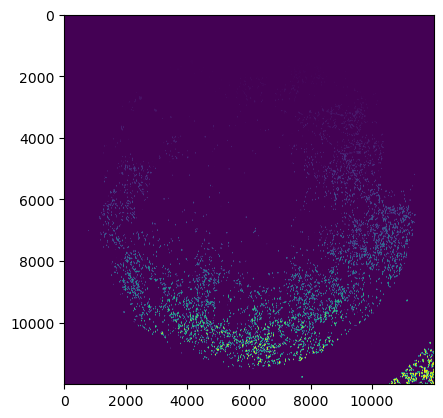

In [17]:
img = io.imread('l_cp_masks.png')
plt.imshow(img) 
plt.show()

In [18]:



### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='tissuenet_cp3', gpu=True)

masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)
io.masks_flows_to_seg(imgs, masks, flows, "tissuenet_cp3_output", channels=channels, diams=diams)
io.save_masks(imgs, masks, flows, "tissuenet_cp3_pngoutput", png=True)

2024-12-25 03:04:01,593 [INFO] >> tissuenet_cp3 << model set to be used
2024-12-25 03:04:01,599 [INFO] Downloading: "https://www.cellpose.org/models/tissuenet_cp3" to /home/krati/.cellpose/models/tissuenet_cp3



100%|██████████| 25.3M/25.3M [01:00<00:00, 440kB/s] 


2024-12-25 03:05:03,047 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:05:03,050 [INFO] >>>> using GPU (CUDA)
2024-12-25 03:05:03,379 [INFO] >>>> loading model /home/krati/.cellpose/models/tissuenet_cp3
2024-12-25 03:05:03,520 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

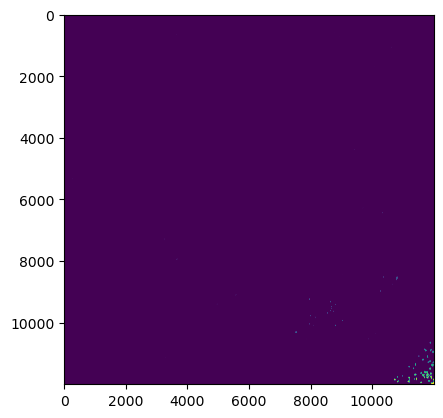

In [19]:
img = io.imread('t_cp_masks.png')
plt.imshow(img) 
plt.show()

In [20]:

### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='yeast_PhC_cp3', gpu=True)

masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)
io.masks_flows_to_seg(imgs, masks, flows, "yeast_PhC_cp3_output", channels=channels, diams=diams)
io.save_masks(imgs, masks, flows, "yeast_PhC_cp3_pngoutput", png=True)

2024-12-25 03:09:04,865 [INFO] >> yeast_PhC_cp3 << model set to be used
2024-12-25 03:09:04,869 [INFO] Downloading: "https://www.cellpose.org/models/yeast_PhC_cp3" to /home/krati/.cellpose/models/yeast_PhC_cp3



100%|██████████| 25.3M/25.3M [00:11<00:00, 2.25MB/s]

2024-12-25 03:09:17,624 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:09:17,627 [INFO] >>>> using GPU (CUDA)


2024-12-25 03:09:17,924 [INFO] >>>> loading model /home/krati/.cellpose/models/yeast_PhC_cp3
2024-12-25 03:09:18,053 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

2024-12-25 03:11:26,429 [WARNING] more than 65535 masks in image, masks returned as np.uint32
2024-12-25 03:12:04,982 [WARNING] found more than 65535 masks in each image, cannot save PNG, saving as TIF


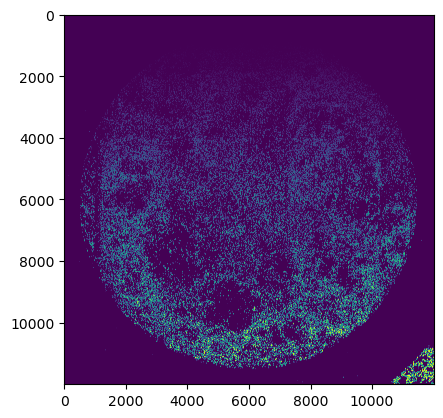

In [22]:
img = io.imread('y_cp_masks.tif')
plt.imshow(img) 
plt.show()

In [23]:

### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='yeast_BF_cp3', gpu=True)

masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)
io.masks_flows_to_seg(imgs, masks, flows, "yeast_BF_cp3_output", channels=channels, diams=diams)
io.save_masks(imgs, masks, flows, "yeast_BF_cp3_pngoutput", png=True)

2024-12-25 03:13:16,802 [INFO] >> yeast_BF_cp3 << model set to be used
2024-12-25 03:13:16,812 [INFO] Downloading: "https://www.cellpose.org/models/yeast_BF_cp3" to /home/krati/.cellpose/models/yeast_BF_cp3



100%|██████████| 25.3M/25.3M [00:20<00:00, 1.27MB/s]


2024-12-25 03:13:39,691 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:13:39,709 [INFO] >>>> using GPU (CUDA)
2024-12-25 03:13:45,130 [INFO] >>>> loading model /home/krati/.cellpose/models/yeast_BF_cp3


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

2024-12-25 03:13:46,628 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


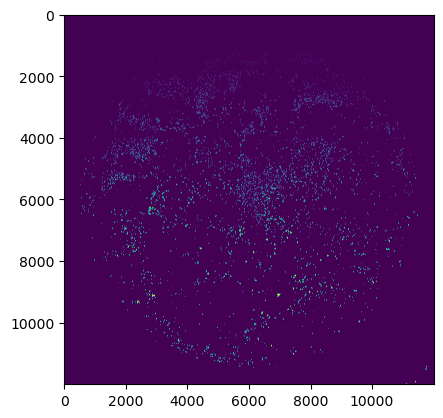

In [24]:
img = io.imread('y_cp_masks.png')
plt.imshow(img) 
plt.show()

In [6]:

### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='bact_fluor_cp3', gpu=True)
diams = 30
masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)
io.masks_flows_to_seg(imgs, masks, flows, "bact_fluor_cp3_output", channels=channels, diams=diams)
io.save_masks(imgs, masks, flows, "bact_fluor_cp3_pngoutput", png=True)

2024-12-25 03:36:49,197 [INFO] >> bact_fluor_cp3 << model set to be used
2024-12-25 03:36:49,624 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:36:49,626 [INFO] >>>> using GPU (CUDA)
2024-12-25 03:36:49,789 [INFO] >>>> loading model /home/krati/.cellpose/models/bact_fluor_cp3
2024-12-25 03:36:49,923 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

2024-12-25 03:42:24,513 [WARNING] more than 65535 masks in image, masks returned as np.uint32
2024-12-25 03:43:19,250 [WARNING] found more than 65535 masks in each image, cannot save PNG, saving as TIF


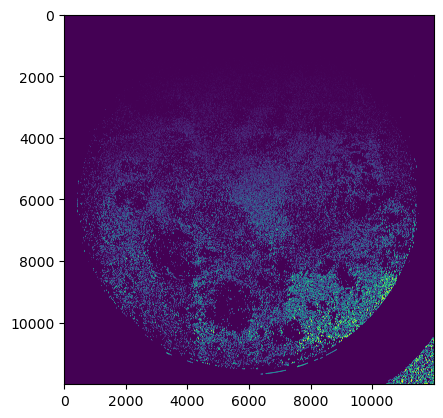

In [7]:
img = io.imread('b_cp_masks.tif')
plt.imshow(img) 
plt.show()

In [8]:

### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='deepbacs_cp3', gpu=True)
diams = 30
masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)
io.masks_flows_to_seg(imgs, masks, flows, "deepbacs_cp3_output", channels=channels, diams=diams)
io.save_masks(imgs, masks, flows, "deepbacs_cp3_pngoutput", png=True)

2024-12-25 03:46:16,225 [INFO] >> deepbacs_cp3 << model set to be used
2024-12-25 03:46:16,230 [INFO] Downloading: "https://www.cellpose.org/models/deepbacs_cp3" to /home/krati/.cellpose/models/deepbacs_cp3



100%|██████████| 25.3M/25.3M [00:25<00:00, 1.04MB/s]


2024-12-25 03:46:45,363 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:46:45,366 [INFO] >>>> using GPU (CUDA)
2024-12-25 03:46:45,511 [INFO] >>>> loading model /home/krati/.cellpose/models/deepbacs_cp3
2024-12-25 03:46:45,611 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

2024-12-25 03:50:12,322 [WARNING] more than 65535 masks in image, masks returned as np.uint32


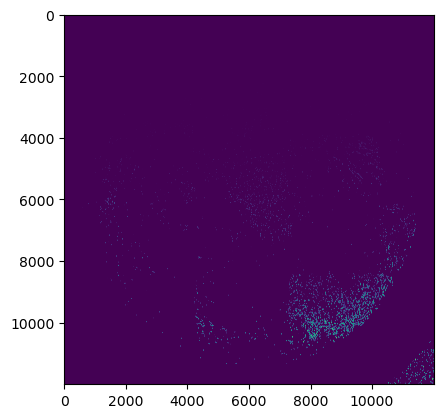

In [9]:
img = io.imread('d_cp_masks.png')
plt.imshow(img) 
plt.show()

In [10]:

### or to run one of the other models, or a custom model, specify a CellposeModel
model = models.CellposeModel(model_type='cyto2_cp3', gpu=True)
diams = 30
masks, flows, styles = model.eval(imgs, diameter=30, channels=[0,0], flow_threshold=0.4, do_3D=False)
io.masks_flows_to_seg(imgs, masks, flows, "cyto2_cp3_output", channels=channels, diams=diams)
io.save_masks(imgs, masks, flows, "cyto2_cp3_pngoutput", png=True)

2024-12-25 03:53:39,657 [INFO] >> cyto2_cp3 << model set to be used
2024-12-25 03:53:39,728 [INFO] Downloading: "https://www.cellpose.org/models/cyto2_cp3" to /home/krati/.cellpose/models/cyto2_cp3



100%|██████████| 25.3M/25.3M [00:31<00:00, 844kB/s] 


2024-12-25 03:54:13,030 [INFO] ** TORCH CUDA version installed and working. **
2024-12-25 03:54:13,042 [INFO] >>>> using GPU (CUDA)
2024-12-25 03:54:13,833 [INFO] >>>> loading model /home/krati/.cellpose/models/cyto2_cp3


/home/krati/anaconda3/envs/cellpose/lib/python3.10/site-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename

2024-12-25 03:54:15,828 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


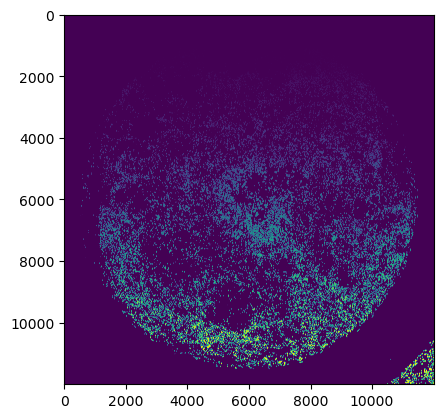

In [11]:
img = io.imread('c_cp_masks.png')
plt.imshow(img) 
plt.show()